In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
cmap = sns.color_palette()
competition_data_path = "../input/g-research-crypto-forecasting/"




#from ctypes import cdll 
#gresearch_crypto =cdll.LoadLibrary('./gresearch_crypto/competition.cpython-37m-x86_64-linux-gnu.so')

## 加密货币详情数据

In [2]:
assets_df = pd.read_csv(os.path.join(competition_data_path, "asset_details.csv"))
assets_df.sort_values("Weight", ascending=False)

,Asset_ID,Weight,Asset_Name
2,1,6.779922,Bitcoin
5,6,5.894403,Ethereum
10,3,4.406719,Cardano
1,0,4.304065,Binance Coin
13,4,3.555348,Dogecoin
0,2,2.397895,Bitcoin Cash
6,9,2.397895,Litecoin
4,7,2.079442,Ethereum Classic
9,12,2.079442,Stellar
8,13,1.791759,TRON


我们看到，本次竞赛的顶级加密货币包括比特币、以太坊、币安币等。此外，我们可以看到权重列，将用于得到'加权皮尔逊相关系数'评价指标。
需要确定这些权重的和加起来是否等于100。

In [3]:
assets_df["Weight"].sum()

40.879847092769616

Looks like the weights add up to `40.88`. Not sure of the exact reason. Let us see the percentage of weights given to each of the assets now. 

In [4]:
assets_df["weight_percentage"] = (assets_df["Weight"] / assets_df["Weight"].sum()) * 100
assets_df.sort_values("Weight", ascending=False)

,Asset_ID,Weight,Asset_Name,weight_percentage
2,1,6.779922,Bitcoin,16.584998
5,6,5.894403,Ethereum,14.418848
10,3,4.406719,Cardano,10.779686
1,0,4.304065,Binance Coin,10.528574
13,4,3.555348,Dogecoin,8.697068
0,2,2.397895,Bitcoin Cash,5.865715
6,9,2.397895,Litecoin,5.865715
4,7,2.079442,Ethereum Classic,5.086716
9,12,2.079442,Stellar,5.086716
8,13,1.791759,TRON,4.382990


In [5]:
fig = px.pie(assets_df, values='weight_percentage', names='Asset_Name',color_discrete_sequence=px.colors.sequential.RdBu, title='各种加密货币在样本中所占的比重')
fig.show()

各种货币在训练集中的占比不同，所以最好为每种货币分开进行模型的训练或者直接为不同的加密货币数据集选择不同的模型

## 训练数据的EDA



In [7]:
crypto_df = pd.read_csv(os.path.join(competition_data_path, "train.csv"))
print(f"数据集的总行数： {crypto_df.shape[0]} ")
#crypto_df.head().to_csv("head.csv")
asset_names_dict = {row["Asset_Name"]:row["Asset_ID"] for ind, row in assets_df.iterrows()}
coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict['Bitcoin']].set_index("timestamp")
import seaborn as sns 
def  plot_density(array,name):
    sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
    plt.title("The Density Of The "+name)
    sns.distplot(array,color="b",bins=1000,kde=True)
    plt.show()
    plt.savefig(name+".png", dpi = 4000,bbox_inches='tight')


数据集的总行数： 24236806 


C:\Users\cultivator\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



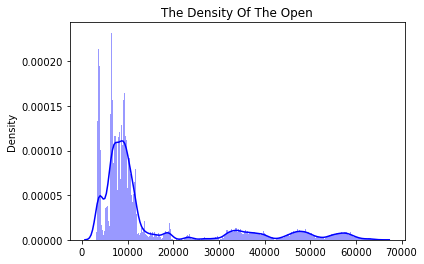

C:\Users\cultivator\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



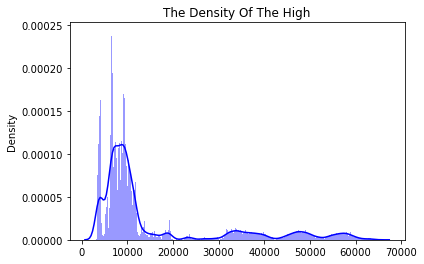

C:\Users\cultivator\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



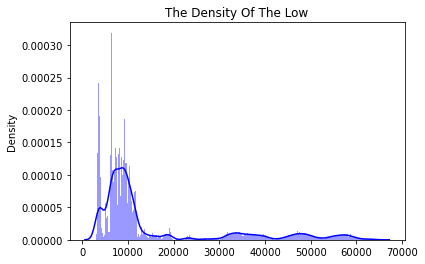

C:\Users\cultivator\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



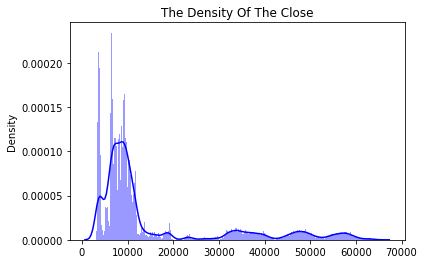

C:\Users\cultivator\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



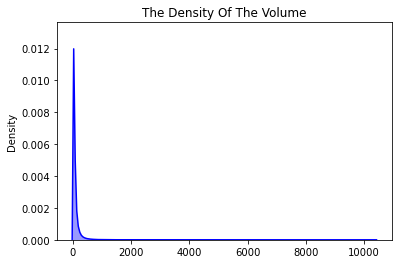

C:\Users\cultivator\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



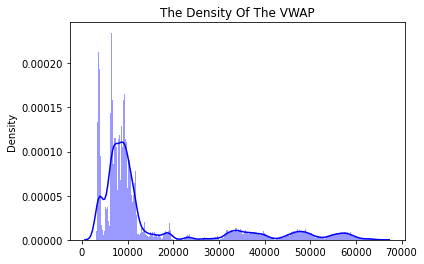

C:\Users\cultivator\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



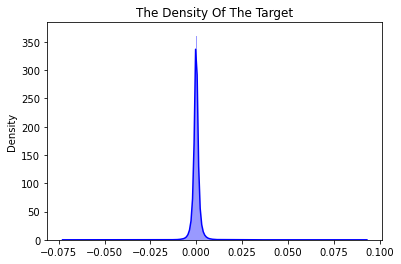

<Figure size 432x288 with 0 Axes>

In [8]:
col = coin_df.columns
col=col[2:]
for i in col:
    plot_density(np.array(coin_df[i]),i)

### 各个货币的起止日期
查看各个货币的原始数据的起始日期，在提交上去的Kaggle Notebook笔记本里，需要选择更新的数据来进行模型的预测

In [7]:

asset_names = [
    'Bitcoin',
    'Ethereum',
    'Cardano',
    'Binance Coin',
    'Dogecoin',
    'Bitcoin Cash',
    'Litecoin',
    'Ethereum Classic',
    'Stellar',
    'TRON',
    'Monero',
    'EOS.IO',
    'IOTA',
    'Maker'
]

time_list = []
for coin in asset_names:
    coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    start_time = coin_df.index[0].astype('datetime64[s]')
    end_time = coin_df.index[-1].astype('datetime64[s]')
    time_list.append([coin, start_time, end_time])
time_df = pd.DataFrame(time_list)
time_df.columns = ["币种", "采样开始", "采样结束"]
time_df

,币种,采样开始,采样结束
0,Bitcoin,2018-01-01 00:01:00,2021-09-21
1,Ethereum,2018-01-01 00:01:00,2021-09-21
2,Cardano,2018-04-17 09:11:00,2021-09-21
3,Binance Coin,2018-01-01 00:01:00,2021-09-21
4,Dogecoin,2019-04-12 14:34:00,2021-09-21
5,Bitcoin Cash,2018-01-01 00:01:00,2021-09-21
6,Litecoin,2018-01-01 00:01:00,2021-09-21
7,Ethereum Classic,2018-01-01 00:01:00,2021-09-21
8,Stellar,2018-02-16 23:53:00,2021-09-21
9,TRON,2018-02-06 21:37:00,2021-09-21


**结果:**
* 数据中最早的开始日期是2018年1月1日，大多数加密货币都有这个开始日期时间。 
* 数据截至2021年9月21日，所有硬币的结束日期时间相同。
* 狗狗币拥有已知硬币中可用的历史信息最少，从2019年4月开始。

### 缺失值
统计原始训练集数据中的缺失值

In [9]:
missing_list = []
for coin in asset_names:
    coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    missing_list.append([coin, coin_df.shape[0]] + coin_df.isna().sum().tolist())
missing_df = pd.DataFrame(missing_list)
missing_df.columns = ["Asset_Name", "TotalRows", 'Missing_Asset_ID', 'Missing_Count', 'Missing_Open', 
                      'Missing_High', 'Missing_Low', 'Missing_Close', 'Missing_Volume', 'Missing_VWAP', 'Missing_Target']
ax=sns.barplot(x='Missing_Target',y="Asset_Name",data=missing_df,palette="Blues_d",capsize=6)
#cmap='RdBu'

ax.set_xlabel("The num of missed target")
ax.set_ylabel(" Asset name")

ax.set_title("Nan values of the target")
ax.get_figure().savefig("missing_target.png", dpi = 4000,bbox_inches='tight')

NameError: name 'asset_names' is not defined

**结果:**
* 数据中最早的开始日期是2018年1月1日，大多数硬币都有这个开始日期时间。  
* 数据截至2021年9月21日，所有硬币的结束日期时间相同。  
* 狗狗币拥有已知硬币中可用的历史信息最少，从2019年4月开始在网上捕获。  

### 数据裂痕

在本次比赛中提到，在给定的一分钟内，缺失的资产数据不是由NaN表示的，而是由这些行的缺失表示的。 所以让我们检查一下数据中的漏洞。  
 我们知道数据每60秒收集一次。 如果连续的行之间有超过一分钟的间隔，则表明在这两行之间缺少数据。 让我们为每一个数据资产检查一下。  

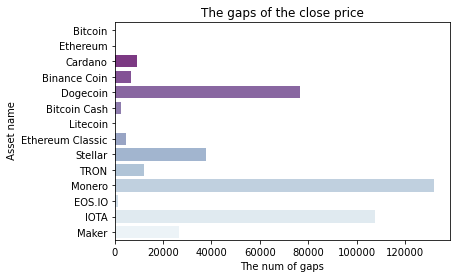

In [9]:
gap_list = []
for coin in asset_names:
    coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    gap_df = (coin_df.index[1:]-coin_df.index[:-1]).value_counts().reset_index()
    n_gaps = gap_df[gap_df["index"]!=60]["timestamp"].sum()
    max_gap = gap_df["index"].max()
    gap_list.append([coin, n_gaps, max_gap])
gap_df = pd.DataFrame(gap_list)
gap_df.columns = ["Asset_Name", "number_of_gaps", "max_gap_in_seconds"]
ax=sns.barplot(x="number_of_gaps",y="Asset_Name",data=gap_df,palette='BuPu_r',capsize=6)
ax.set_xlabel("The num of gaps")
ax.set_ylabel(" Asset name")
ax.set_title("The gaps of the close price")
ax.get_figure().savefig("gapppp.png", dpi = 400,bbox_inches='tight')

**结论:** 
* 在数据集中有很多个缺口，我们需要思考一种方式来填充  
* Makercoin最大间隙281700秒大约有约78小时，可视为停盘 
* 当我们在数据中有缺口时，导致不能计算这些空白之后的一段时间的收益率。 我认为这就是所有的target数据中缺少目标值的原因。 

### 可视化

可视化所有数据的收盘价

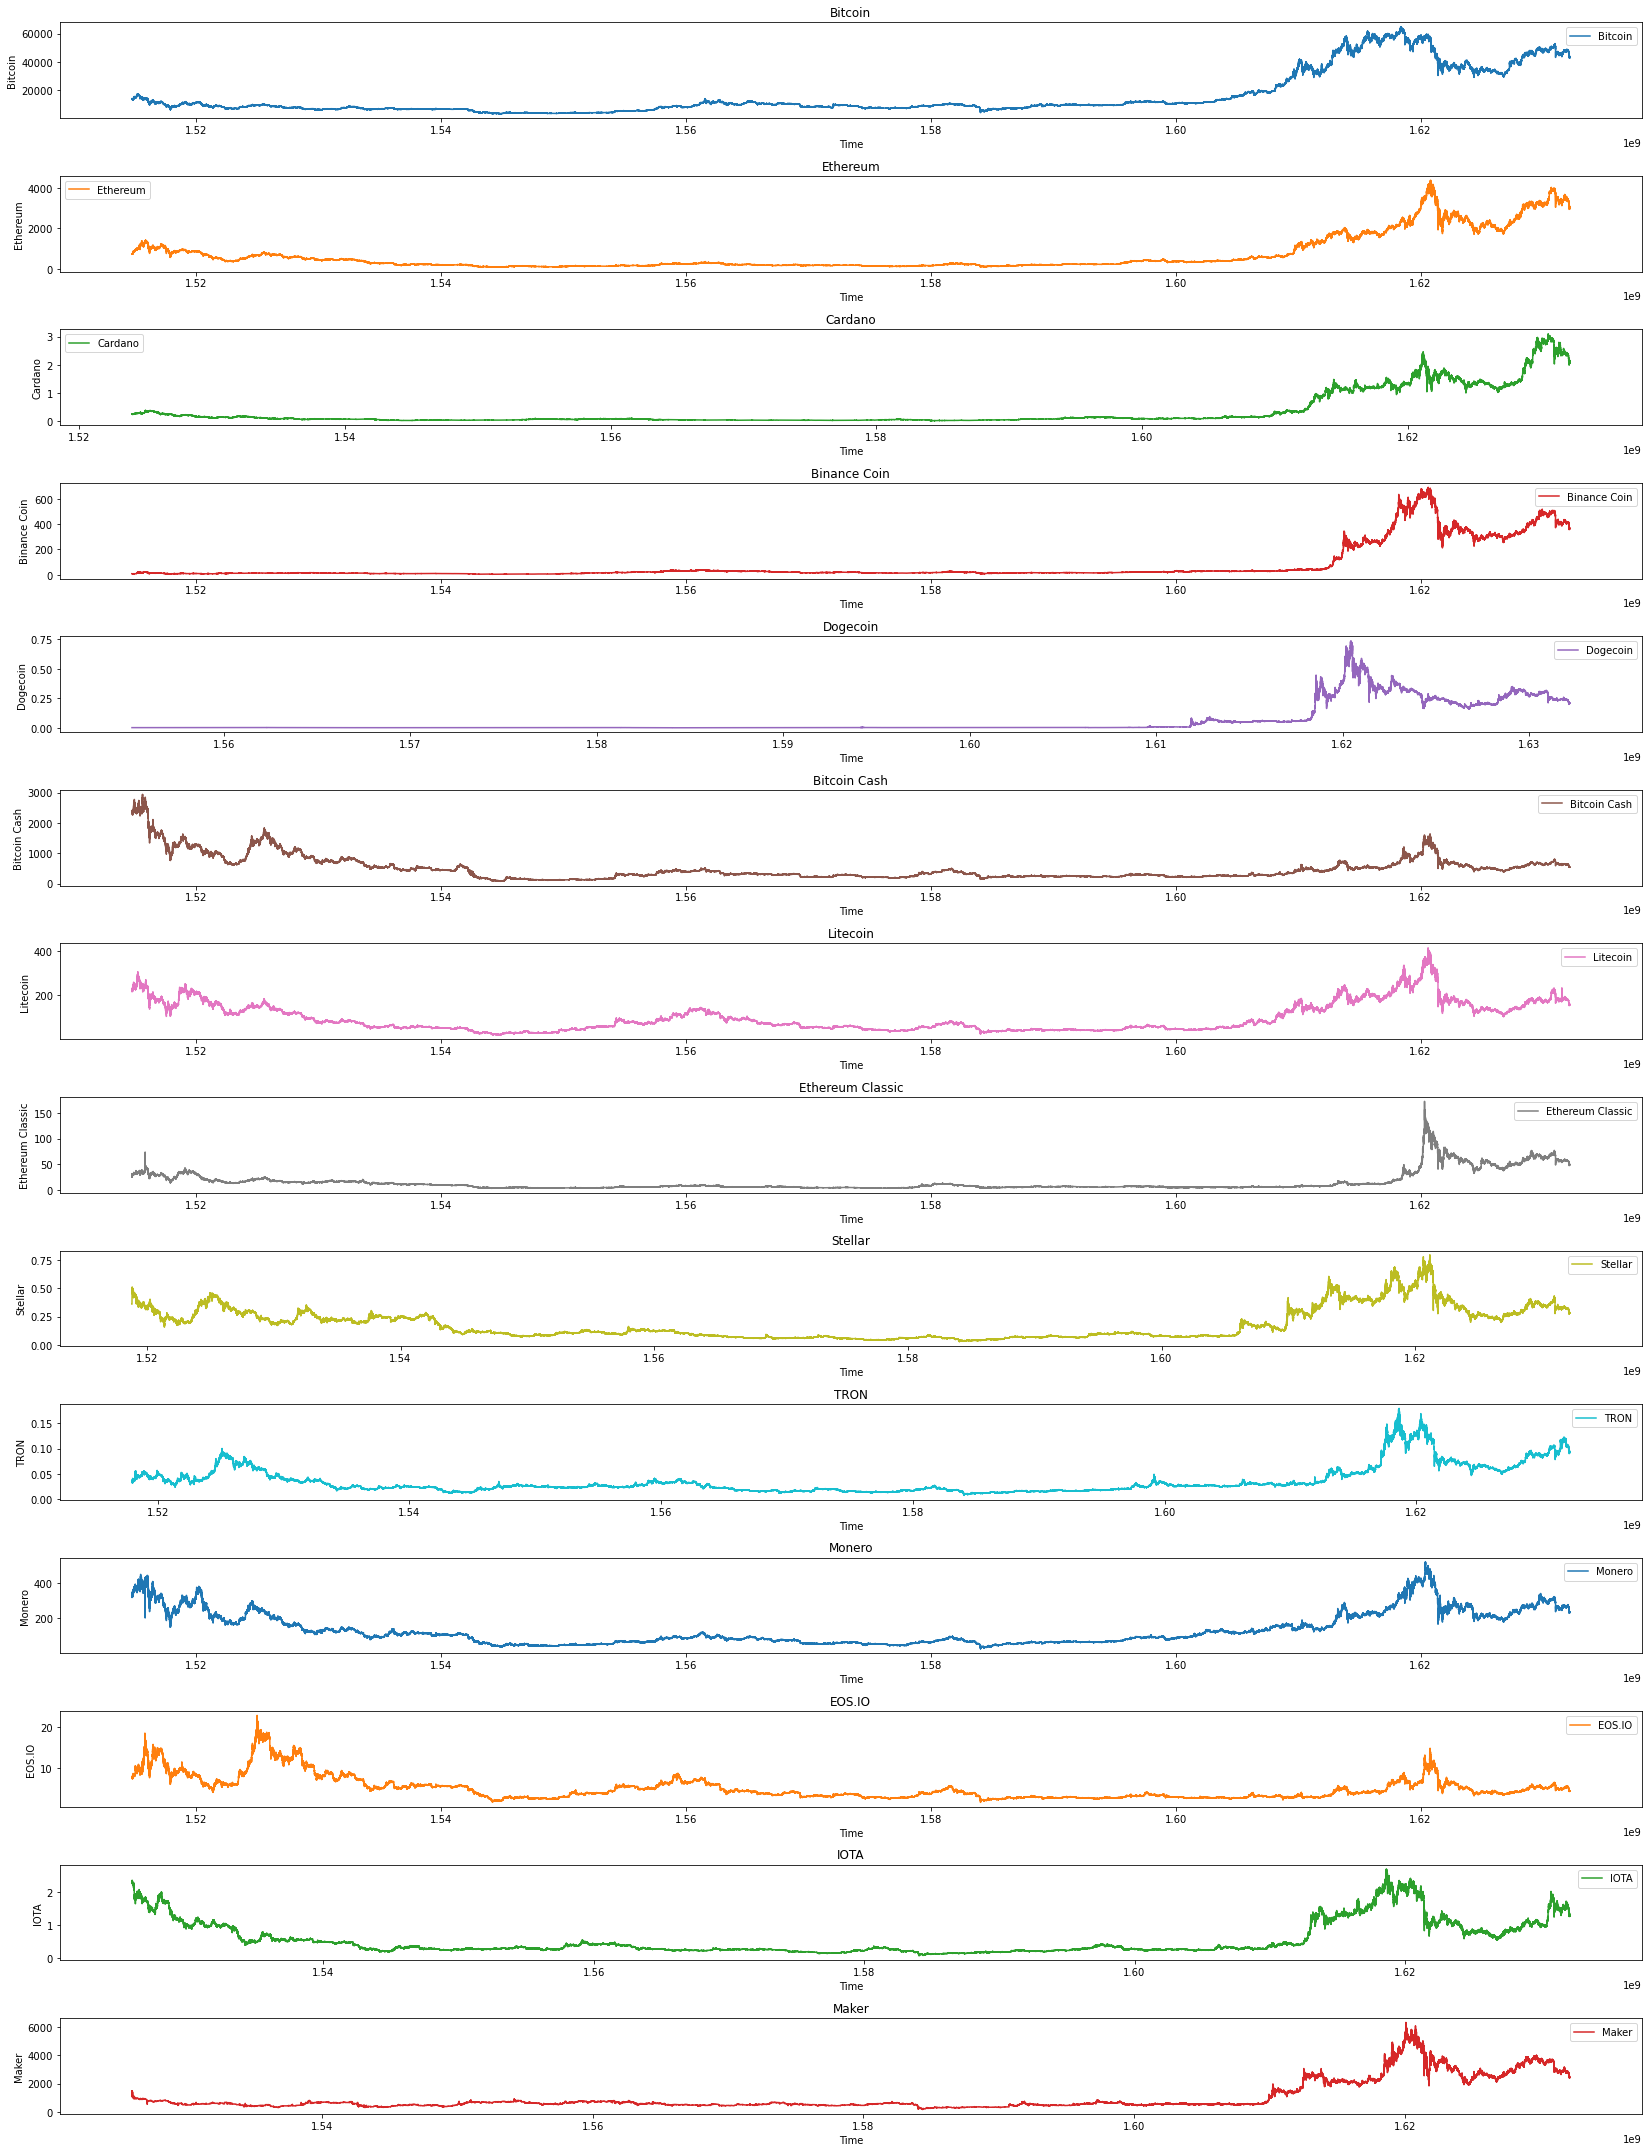

In [10]:

f = plt.figure(figsize=(23,30))
for ind, coin in enumerate(asset_names):
    coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    coin_df = coin_df.reindex(range(coin_df.index[0],coin_df.index[-1]+60,60),method='pad')  #reindex函数
    ax = f.add_subplot(14,1,ind+1)
    plt.plot(coin_df['Close'], label=coin, color=cmap[ind%10])   #保证不同的加密货币的图像有不同的color参数
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel(coin)
    plt.title(coin)

plt.tight_layout()#自动调整子图参数，使之填充整个图像区域。
plt.show()

**结论:**
* 从图像上看不同加密货币的收盘价之间似乎有很好的相关性，而且似乎在不同的时间区间中也有所不同。  
* 我们有2018年的熊市数据，2021年的牛市数据，2019年和2020年的横向数据。 所以这个数据集捕捉了不同虚拟货币经济周期的市场供我们建模。  

在上面的EDA的工作中，不同的加密货币的样本数据有不同的时间区间。 所以，让我们只看2021年7月31日之后的数据，看看不同加密货币的价格走势。  

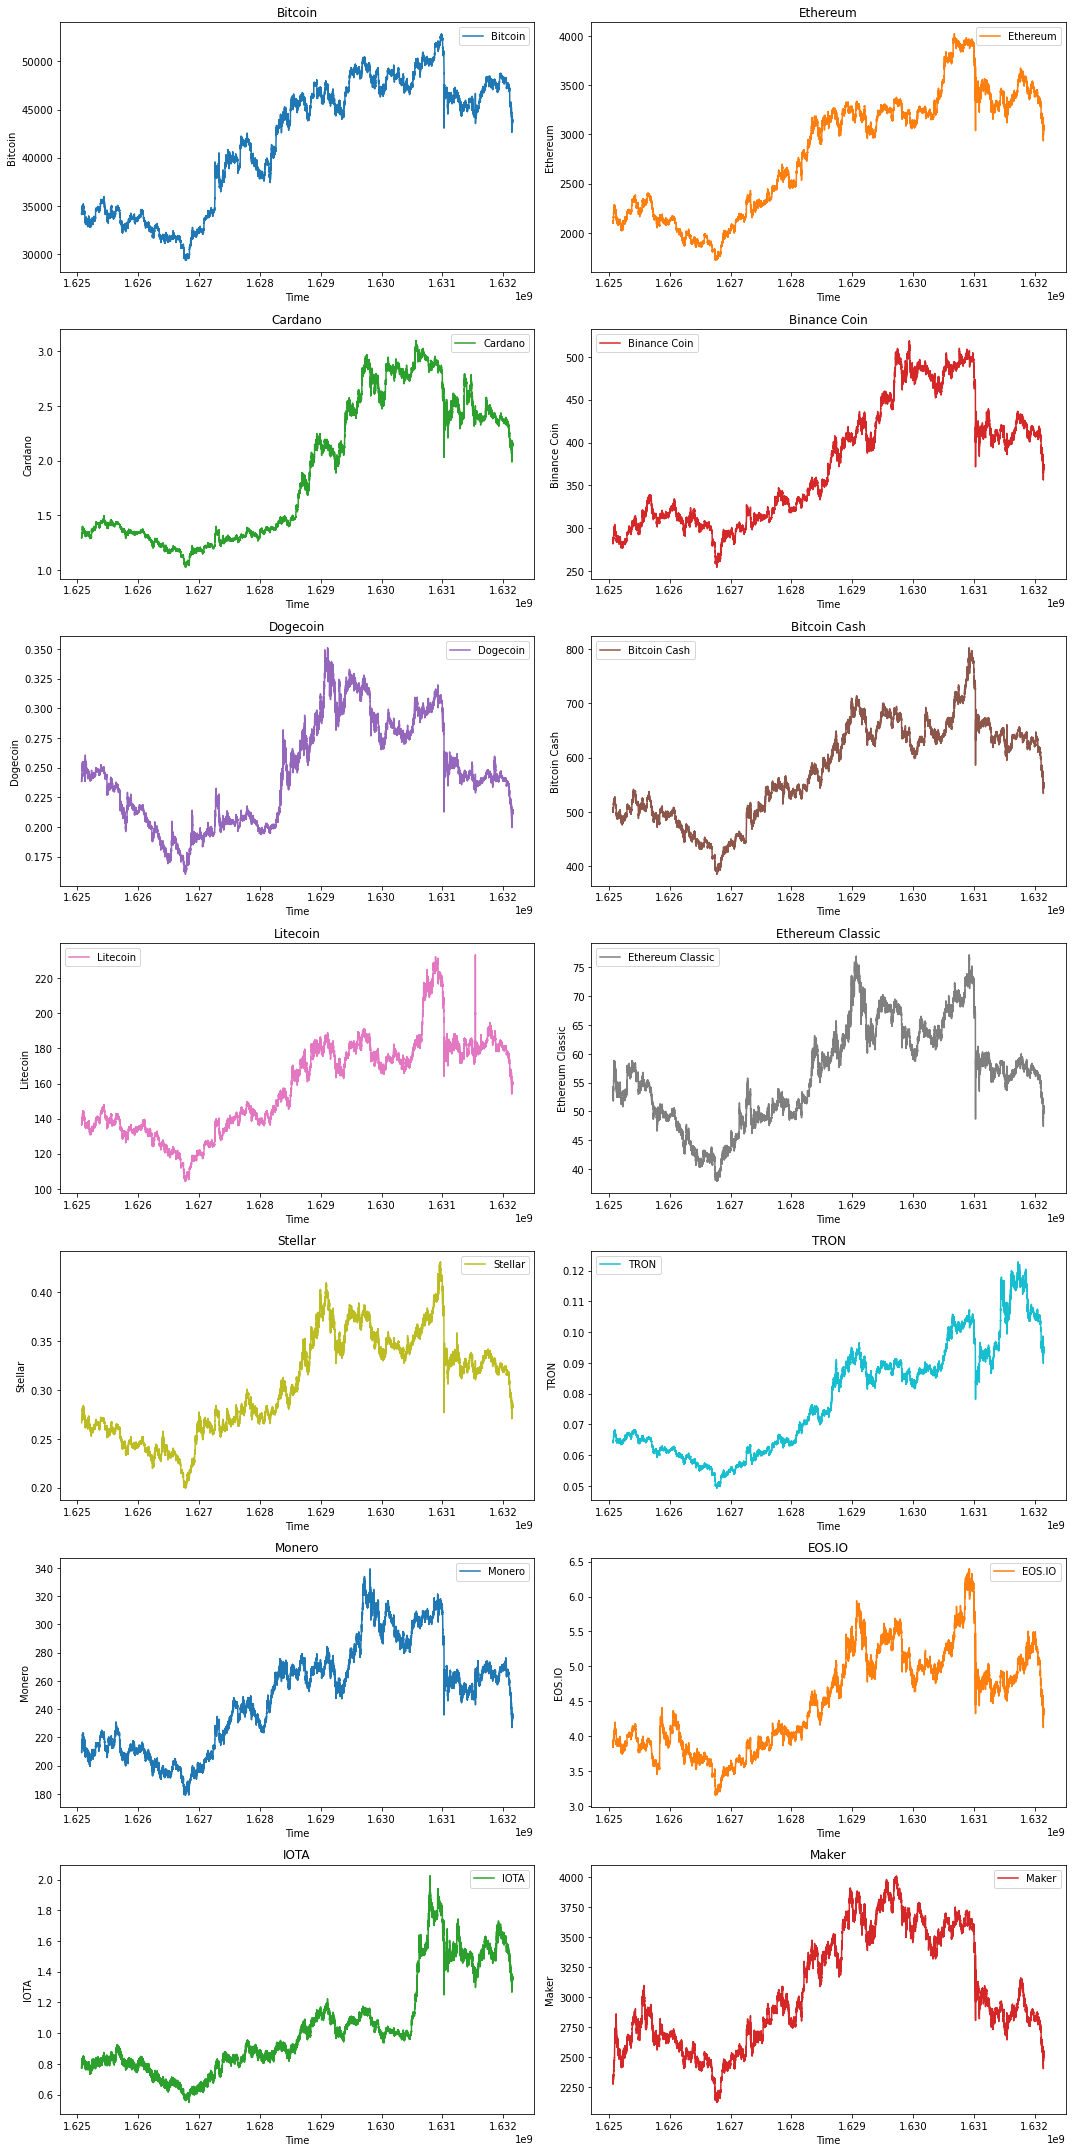

In [11]:
import time
# 把datatime类型的数据转换成时间戳
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))

# 确定时间区间进行图像绘制
f = plt.figure(figsize=(15,30))

for ind, coin in enumerate(asset_names):
    coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    # fill missing values 
    coin_df = coin_df.reindex(range(coin_df.index[0],coin_df.index[-1]+60,60),method='pad')
    coin_df = coin_df.loc[totimestamp('01/07/2021'):totimestamp('21/09/2021')]
    ax = f.add_subplot(7,2,ind+1)
    plt.plot(coin_df['Close'], label=coin, color=cmap[ind%10])
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel(coin)
    plt.title(coin)

plt.tight_layout()
plt.show()

## 相关性

### 不同数字加密货币的收盘价格的相关情况

为了数值化这些数字加密资产的关联程度，创建一个有关这些不同加密货币最近一段时间(从2021年7月1日起)的收盘价格的相关图

In [ ]:
import time
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))
all_assets_df = pd.DataFrame([])
for ind, coin in enumerate(asset_names):
    coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    coin_df = coin_df.reindex(range(coin_df.index[0],coin_df.index[-1]+60,60),method='pad')
    # fill missing values
    coin_df = coin_df.loc[totimestamp('01/07/2021'):totimestamp('21/09/2021')]
    close_values = coin_df["Close"].fillna(0)
    close_values.name = coin
    all_assets_df = all_assets_df.join(close_values, how="outer")

corrmat = all_assets_df.corr()
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corrmat, vmax=1., square=True, cmap='gist_yarg')

plt.title("虚拟货币收盘价之间的相关关系", fontsize=15)
plt.savefig("corr_close_price.png")
plt.show()
plt.close()

**结论:**
* 数字加密货币的价格存在高度的相关性
* 大部分的相关性都保持在0.5以上


 **高相关性的货币** 
* 比特币和以太坊  
* Cardano & Binance币  
* 比特币现金和莱特币  
    
### Correlation on Log Returns

But we got the correlation on actual values. Different coins are in different price ranges. So let us use the `log returns` as suggested by the [tutorial notebook](https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition) and check the correlation for the latest time period.

From the tutorial notebook, 

**Log returns**

In order to analyze price changes for an asset we can deal with the price difference. However, different assets exhibit different price scales, so that the their returns are not readily comparable. We can solve this problem by computing the percentage change in price instead, also known as the return. This return coincides with the percentage change in our invested capital.

Returns are widely used in finance, however log returns are preferred for mathematical modelling of time series, as they are additive across time. Also, while regular returns cannot go below -100%, log returns are not bounded.

To compute the log return, we can simply take the logarithm of the ratio between two consecutive prices. The first row will have an empty return as the previous value is unknown, therefore the empty return data point will be dropped.

In [13]:
# define function to compute log returns
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

C:\Users\cultivator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 23545 missing from current font.

C:\Users\cultivator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 25968 missing from current font.

C:\Users\cultivator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 25910 missing from current font.

C:\Users\cultivator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 30410 missing from current font.

C:\Users\cultivator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 29575 missing from current font.

C:\Users\cultivator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 30340 missing from current font.

C:\Users\cultivator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 30456 missing from 

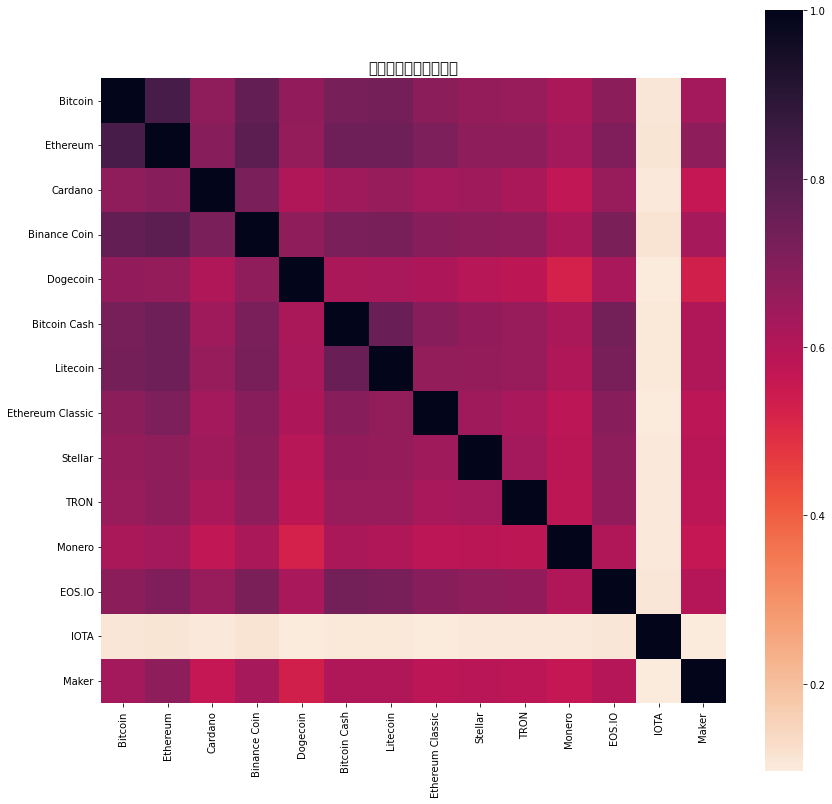

In [14]:
all_assets_df = pd.DataFrame([])
for ind, coin in enumerate(asset_names):
    coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    coin_df = coin_df.reindex(range(coin_df.index[0],coin_df.index[-1]+60,60),method='pad')
    # fill missing values
    coin_df = coin_df.loc[totimestamp('01/07/2021'):totimestamp('21/09/2021')]
    return_values = log_return(coin_df["Close"].fillna(0))[1:]
    return_values.name = coin
    all_assets_df = all_assets_df.join(return_values, how="outer")

corrmat = all_assets_df.corr()
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corrmat, vmax=1., square=True, cmap="rocket_r")
plt.title("对数收益率的相关关系", fontsize=15)
plt.show()

**Inference:**
* In the recent months, when we look at the log returns, IOTA has a very low correlation with other coins
* Bitcoin and Ethereum still shows a high correlation.
* Looks like correlation between the assets change over time and so this needs to be addressed while building models

### Correlation change over time

Now let us see how the correlations have changed over time on the log returns. We can just look at the coins Bitcoin, Ethereum, Dogecoin and IOTA and see how the correlations have changed over time.

In [15]:
from bokeh.models import Panel, Tabs
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

def get_plots(df, col1, col2):
    p = figure(plot_width=1000, plot_height=500, title=f"{col1} & {col2} - correlation distribution over time")
    p.line(df['timestamp'], df[col1], alpha=0.7)
    return p

main_tabs_list = []
for coin1 in ['Bitcoin', 'Ethereum', 'Dogecoin', 'IOTA']:
    tab_list = []
    coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin1]].set_index("timestamp")
    coin_df = coin_df.reindex(range(coin_df.index[0],coin_df.index[-1]+60,60),method='pad')
    return1_values = log_return(coin_df["Close"].fillna(0))[1:]
    return1_values.name = coin1
    for coin2 in asset_names:
        if coin2 != coin1:
            coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin2]].set_index("timestamp")
            coin_df = coin_df.reindex(range(coin_df.index[0],coin_df.index[-1]+60,60),method='pad')
            return2_values = log_return(coin_df["Close"].fillna(0))[1:]
            return2_values.name = coin2
            two_assets = pd.concat([return1_values, return2_values], axis=1)
            corr_time_df = two_assets.groupby(two_assets.index//(10000*60)).corr().loc[:,coin1].loc[:,coin2].reset_index()
            p = get_plots(corr_time_df, coin1, coin2)
            tab = Panel(child=p, title=f"Corr:{coin1} & {coin2}")
            tab_list.append(tab)
    tabs = Tabs(tabs=tab_list)
    panel = Panel(child=tabs, title=coin1)
    main_tabs_list.append(panel)
            

tabs = Tabs(tabs=main_tabs_list)
show(tabs)

Loading BokehJS ...

**Inference:**
* We could clearly see that the correlations between the assets are changing over time
* We can see that the correlation between bitcoin and ethereum is volatile and is high for most time periods.
* If we look at the correlation of assets with IOTA, it is not as high as other pairs.
* Since we are looking at the residualized returns in this competition, correlation between the assets play an important role. 


### Reference

Thanks to all the below notebooks / discussions which served as references. Kindly upvote them too.

* [Tutorial to the G-Research Crypto Competition](https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition)

#### Notebook in progress. Please visit later for more updates.